### **Support Vector Machines (SVM) - Beginner-Friendly Explanation**

#### **Concept of SVM**
Support Vector Machines (SVM) is a supervised machine learning algorithm used for both **classification** and **regression** tasks. However, it's more commonly used for classification. The primary goal of SVM is to find a decision boundary (called a **hyperplane**) that best separates the classes in the dataset.
SVM works well in high-dimensional spaces and is effective even when there is no clear linear boundary, thanks to the kernel trick.


 
---

#### **Analogy for SVM:**
Imagine you are at a park, and there are two groups of people: one group wearing **red shirts** and the other wearing **blue shirts**. You want to draw a line (boundary) between the two groups so that each group stays on its side. SVM helps you find the **widest path** that separates these two groups with the maximum distance between them and this boundary. This ensures that future visitors (new data points) are classified correctly.

---

### **Key Concepts of SVM:**
1. **Hyperplane**: The decision boundary that separates different classes. A line (in 2D), plane (in 3D), or higher-dimensional surface that divides the data into classes.
Example: In binary classification, the hyperplane separates points belonging to class A from class B.
2. **Support Vectors**: The closest points to the hyperplane from each class. These points are crucial for defining the hyperplane.These are the closest points to the hyperplane from each class.
The position of these points determines the hyperplane.
3. **Margin**: The distance between the hyperplane and the nearest support vectors. SVM aims to maximize this margin.The distance between the hyperplane and the nearest data point of either class.
SVM aims to maximize this margin for better generalization.
4. **Kernel Trick**: If data is not linearly separable, SVM can project data into a higher-dimensional space using kernels to make it separable.When the data is not linearly separable, kernels are used to transform the data into a higher-dimensional space where a linear hyperplane can separate the classes.
Common kernels: Linear, Polynomial, Radial Basis Function (RBF), and Sigmoid.

---

### **Real-World Scenarios:**
1. **Email Spam Detection**: Classify emails into "Spam" or "Not Spam" using the SVM algorithm.
2. **Medical Diagnosis**: Classify whether a tumor is "Benign" or "Malignant" based on patient data.
3. **Face Recognition**: Identify individuals by separating facial features using SVM.

---

### **How SVM is Interlinked to Other Algorithms:**
- **Similar to Logistic Regression**: Both are used for binary classification but SVM can handle non-linear boundaries using kernels.
- **Related to KNN**: Both use distance-based methods, but SVM finds a hyperplane rather than relying on neighbors.
- **Complementary to Decision Trees**: SVM finds optimal decision boundaries, while trees split data hierarchically.

### How SVM Works (Intuition for Beginners):
Think of SVM as a referee deciding how to best separate two competing teams (data classes).
It places a line (or hyperplane) such that the distance to the nearest player from each team (support vectors) is maximized.
If the teams are mixed and can't be separated by a straight line, SVM uses a "magic wand" (kernel) to transform the field into a new space where they can be separated.

### Advantages of SVM
Works well with high-dimensional data.
Effective for both linear and non-linear classification.
Robust to overfitting, especially in high-dimensional spaces.

### Disadvantages of SVM
Computationally expensive for large datasets.
Choosing the correct kernel and hyperparameters requires careful tuning.
Less interpretable compared to simpler models like Logistic Regression.
This detailed explanation and code should help you grasp the concepts and practical applications of SVM.

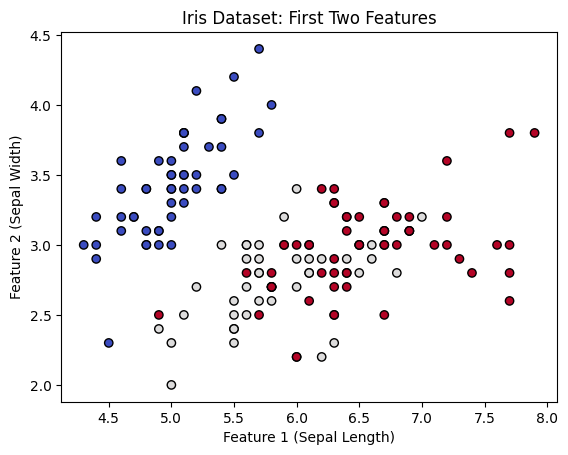

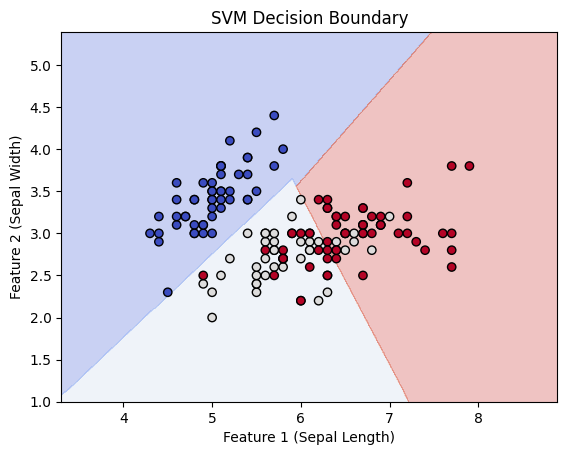

Sample 1 (Feature 1: 5.0, Feature 2: 3.5): Predicted Class 0
Sample 2 (Feature 1: 6.5, Feature 2: 2.5): Predicted Class 2


In [1]:
# Import necessary libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualization
from sklearn import datasets  # For sample datasets
from sklearn.svm import SVC  # SVM Classifier



# Step 1: Load a dataset
# Here we use the Iris dataset, which is commonly used for classification tasks
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using the first two features for easier visualization
y = iris.target  # Target labels (class labels: 0, 1, 2)



# Step 2: Visualize the dataset
# Scatter plot of the data to observe how points are distributed
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
plt.title("Iris Dataset: First Two Features")
plt.xlabel("Feature 1 (Sepal Length)")
plt.ylabel("Feature 2 (Sepal Width)")
plt.show()


# Step 3: Train an SVM classifier
# Initializing the SVM model with a linear kernel
svm_model = SVC(kernel="linear", C=1.0, random_state=42)  
# `C` is the regularization parameter; smaller values encourage a larger margin
# Train the SVM model on the dataset
svm_model.fit(X, y)


# Step 4: Define a function to visualize the decision boundary
def plot_decision_boundary(X, y, model):
    """
    This function plots the decision boundary of the SVM model.
    It creates a mesh grid of points and predicts their class to visualize the boundary.
    """
    # Define grid dimensions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  # Reshape predictions to match grid shape
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # Contour plot for the decision
    # regions. plt.scatter creates a scatter plot. X[:, 0] and X[:, 1] are the first and second
    # features (sepal length and sepal width).c=y colors the points based on their target
    # labels.cmap=plt.cm.coolwarm specifies color map.edgecolors="k" adds black edges to points.
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)  # Original data points
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1 (Sepal Length)")
    plt.ylabel("Feature 2 (Sepal Width)")
    plt.show()


# Step 5: Visualize the decision boundary
plot_decision_boundary(X, y, svm_model)
# SVC initializes the SVM classifier.kernel="linear" specifies a linear kernel, meaning the SVM 
# will attempt to find a straight-line hyperplane to separate the classes.
# C=1.0 is the regularization parameter that controls the trade-off between maximizing margin 
#and minimizing classification errors.random_state=42 ensures reproducibility by setting the 
#seed for random number generation.



# Step 6: Make predictions with the trained model
# Predict the class of a new data point
new_data = np.array([[5.0, 3.5], [6.5, 2.5]])  # New samples
predictions = svm_model.predict(new_data)  # Predict classes
for i, sample in enumerate(new_data):
    print(f"Sample {i+1} (Feature 1: {sample[0]}, Feature 2: {sample[1]}): Predicted Class {predictions[i]}")

### **Various SVM Methods**
Support Vector Machines (SVM) have several variations and extensions that cater to different tasks and data types. Below is a list of key methods associated with SVM:

#### 1. **Types of SVM based on Tasks**
- **Linear SVM**: Used for linearly separable data where a straight hyperplane can separate classes.
- **Non-Linear SVM**: Utilizes kernels to handle data that isn’t linearly separable.
- **Support Vector Regression (SVR)**: Extends SVM to regression tasks, predicting continuous values.
- **One-Class SVM**: Detects anomalies or outliers by modeling the majority class in the dataset.

#### 2. **Kernel Methods**
- **Linear Kernel**: Suitable for linearly separable data.
- **Polynomial Kernel**: Captures complex relationships by mapping features into a polynomial space.
- **Radial Basis Function (RBF) Kernel**: Maps data into a higher-dimensional space, ideal for non-linear problems.
- **Sigmoid Kernel**: Works like a neural network, less commonly used.

#### 3. **Regularization Variants**
- **Soft Margin SVM**: Allows some misclassifications to improve generalization.
- **Hard Margin SVM**: Requires all data points to be correctly classified, which works only for perfectly separable data.

#### 4. **Multiclass SVM Methods**
- **One-vs-One (OvO)**: Creates binary classifiers for each pair of classes.
- **One-vs-All (OvA)**: Creates one binary classifier for each class against the rest.

---

### **Interview Questions for SVM**

#### **Basic Level Questions**
1. **What is a Support Vector Machine (SVM)?**
   - SVM is a supervised machine learning algorithm used for classification and regression. It finds the optimal hyperplane that best separates the data into classes.

2. **What is a hyperplane?**
   - A hyperplane is a decision boundary in an n-dimensional space that separates classes of data.

3. **What is the role of support vectors in SVM?**
   - Support vectors are data points closest to the hyperplane that influence its position and orientation. They define the margin of the hyperplane.

4. **What are kernels in SVM?**
   - Kernels are functions that transform input data into a higher-dimensional space to make it easier to separate using a hyperplane.

#### **Intermediate Level Questions**
1. **What is the difference between soft margin and hard margin SVM?**
   - Soft margin allows some misclassifications to improve model generalization, while hard margin strictly enforces all points to be correctly classified.

2. **Explain the C parameter in SVM.**
   - The **C** parameter controls the trade-off between achieving a low error on the training data and maximizing the margin. A smaller **C** creates a wider margin but allows more misclassifications.

3. **What are the advantages of using an RBF kernel?**
   - The RBF kernel is flexible, can handle non-linear data, and doesn’t require prior knowledge about the data distribution.

4. **How do you choose the right kernel for your SVM model?**
   - By experimenting with different kernels, cross-validation, and understanding the data’s nature. Linear kernels work for linearly separable data, while RBF is suitable for complex patterns.

#### **Advanced Level Questions**
1. **How does SVM handle imbalanced datasets?**
   - By using techniques like adjusting the **class weights**, oversampling the minority class, or undersampling the majority class.

2. **What is the dual form in SVM, and why is it used?**
   - The dual form reformulates the optimization problem using Lagrange multipliers, which allows the use of kernels for non-linear data.

3. **Explain the mathematical intuition behind the RBF kernel.**
   - The RBF kernel computes similarity based on the distance between two points, exponentially decaying the influence of points as they move farther apart.

4. **Can SVM be used for large datasets? Why or why not?**
   - SVM can struggle with large datasets due to its computational complexity (O(n²) or higher for training). Methods like stochastic gradient descent (SGD) can make SVM scalable.

#### **Scenario-Based Questions**
1. **When would you use SVM over logistic regression?**
   - When the data is not linearly separable and requires a kernel to map it to a higher-dimensional space.

2. **How do you tune the hyperparameters of an SVM model?**
   - By using techniques like grid search or random search for hyperparameters like **C**, the kernel type, and kernel-specific parameters.

3. **How does the choice of kernel impact the SVM performance?**
   - The kernel dictates how the data is transformed and separated. A poor choice may result in underfitting or overfitting.

4. **Explain SVM’s application in text classification.**
   - SVM is widely used for text classification due to its ability to handle high-dimensional feature spaces like TF-IDF vectors.

#### **Coding-Based Questions**
1. **Write Python code to implement a simple SVM classifier using scikit-learn.**
   - See code explained earlier.

2. **Demonstrate how to tune SVM parameters using GridSearchCV.**
   -
These questions, spanning all levels, prepare you for SVM-related topics in interviews.

### **SVM (Support Vector Machine) Interview Questions with Detailed Answers**

#### **Basic-Level Questions**

1. **What is SVM?**
   - **Answer**:  
     SVM is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane in an n-dimensional space that distinctly classifies the data points.

2. **What is a hyperplane in SVM?**
   - **Answer**:  
     A hyperplane is a decision boundary that separates different classes in the feature space. In 2D, it is a line; in 3D, it is a plane, and in higher dimensions, it is a general decision surface.

3. **What are support vectors in SVM?**
   - **Answer**:  
     Support vectors are the data points closest to the hyperplane. These points influence the orientation and position of the hyperplane, effectively defining the margin.

4. **What are the types of SVM?**
   - **Answer**:  
     - **Linear SVM**: For linearly separable data.
     - **Non-Linear SVM**: For data that isn’t linearly separable, using kernels.
     - **SVM for Regression (SVR)**: Predicts continuous values.
     - **One-Class SVM**: For anomaly detection.

---

#### **Intermediate-Level Questions**

1. **What are kernels in SVM, and why are they important?**
   - **Answer**:  
     Kernels are mathematical functions that transform data into a higher-dimensional space to make it separable. Common kernels include:
     - **Linear Kernel**: For linearly separable data.
     - **Polynomial Kernel**: Captures complex relationships.
     - **RBF Kernel**: Maps data into a higher-dimensional space for non-linear patterns.
     - **Sigmoid Kernel**: Mimics a neural network.

2. **What is the role of the C parameter in SVM?**
   - **Answer**:  
     The **C** parameter controls the trade-off between maximizing the margin and minimizing classification error:
     - A smaller **C** value encourages a wider margin but allows some misclassifications.
     - A larger **C** value tries to classify all points correctly, potentially leading to overfitting.

3. **How does the gamma parameter affect the RBF kernel in SVM?**
   - **Answer**:  
     Gamma defines how far the influence of a single training example reaches:
     - A low gamma value considers far-off points, resulting in smoother decision boundaries.
     - A high gamma value focuses on closer points, creating tighter, more complex boundaries.

4. **What is the difference between soft margin and hard margin in SVM?**
   - **Answer**:  
     - **Soft Margin**: Allows some misclassifications to improve generalization and handle noisy data.
     - **Hard Margin**: Enforces all data points to be correctly classified, suitable only for perfectly separable data.

---

#### **Advanced-Level Questions**

1. **Explain the dual optimization problem in SVM.**
   - **Answer**:  
     SVM optimization can be expressed in a dual form using Lagrange multipliers. The dual problem:
     - Focuses only on support vectors, making the solution sparse.
     - Facilitates the use of kernels to handle non-linear data.

2. **How does SVM handle multi-class classification?**
   - **Answer**:  
     SVM uses:
     - **One-vs-One (OvO)**: Creates binary classifiers for every pair of classes. For \( n \) classes, \( n(n-1)/2 \) classifiers are built.
     - **One-vs-All (OvA)**: Builds one binary classifier for each class against all other classes.

3. **When should you use SVM over other algorithms?**
   - **Answer**:  
     - When the dataset has fewer samples and higher dimensions.
     - For non-linear data separability with kernel tricks.
     - When high accuracy is required for complex decision boundaries.

4. **What are the drawbacks of SVM?**
   - **Answer**:  
     - High computational complexity for large datasets.
     - Choosing the right kernel and hyperparameters can be challenging.
     - Poor performance on overlapping data points.

---

#### **Scenario-Based Questions**

1. **How would you handle an imbalanced dataset using SVM?**
   - **Answer**:  
     - Use the `class_weight` parameter in scikit-learn’s `SVC` to assign higher weights to the minority class.
     - Resample the dataset using techniques like SMOTE (Synthetic Minority Oversampling Technique).

2. **How do you tune hyperparameters for an SVM model?**
   - **Answer**:  
     Use grid search or random search to tune parameters like:
     - **C**: Regularization parameter.
     - **Gamma**: Kernel coefficient for RBF.
     - **Kernel**: Type of kernel to use.

3. **When would you choose an RBF kernel over a linear kernel?**
   - **Answer**:  
     An RBF kernel is preferred for data that is not linearly separable. A linear kernel is suitable for datasets where a straight hyperplane can separate the classes.

4. **Why might SVM not perform well on large datasets?**
   - **Answer**:  
     SVM has high computational complexity (O(n²) or higher), making it inefficient for large datasets with millions of samples.

---

#### **Coding-Based Questions**

1. **Write Python code to implement a simple SVM classifier.**
   ```python
   from sklearn import datasets
   from sklearn.model_selection import train_test_split
   from sklearn.svm import SVC
   from sklearn.metrics import accuracy_score

   # Load dataset
   iris = datasets.load_iris()
   X, y = iris.data, iris.target

   # Split data
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

   # Train SVM
   model = SVC(kernel='rbf', C=1, gamma=0.5)
   model.fit(X_train, y_train)

   # Predict and evaluate
   predictions = model.predict(X_test)
   print("Accuracy:", accuracy_score(y_test, predictions))
   ```

2. **Explain how to use GridSearchCV to tune SVM parameters.**
   ```python
   from sklearn.model_selection import GridSearchCV

   param_grid = {
       'C': [0.1, 1, 10],
       'gamma': [1, 0.1, 0.01],
       'kernel': ['rbf']
   }

   grid = GridSearchCV(SVC(), param_g refit=True, verbose=2)
   grid.fit(X_train, y_train)

   print("Best Parameters:", grid.best_params_)
   ```

---

### **Mock Interview Tips**
1. **Understand the theory thoroughly**: Concepts like kernel trick, margin, and optimization are often discussed.
2. **Know the mathematical formulations**: Be prepared to discuss loss functions and dual optimization.
3. **Be ready for coding tests**: Practice implementing SVM models in Python using sciithms like logistic regression or random forest.

By mastering these questions and answers, you’ll be well-prepared for SVM-related topics in interviews.